In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import tqdm as tq
import string
import statistics as stats

# Extract stop-and-search data for one police force

In [ ]:
# To make a dataframe for stop-and-search for one district only 
# (district name must correspond to the one in file name)
def extract_sas_for_district(district):
    directory = "Jan_2012_Oct_2021" # Change directory
    df_sas = pd.DataFrame()

    folders = [folder for folder in tq.tqdm(os.listdir(directory)) if not str(folder).strip("'b").startswith('.')]
    
    for folder in tq.tqdm(folders):
        files_sas = []

        # Here you can change the date range
        if int(folder[:4]) > 2014:
            # generate the path to folder
            folder_direc = os.fsencode(directory + '/'+ str(folder))
        
            # add each file name to the appropriate list
            for file in os.listdir(folder_direc):
                file = str(file).strip("'b")
                # check if the file name contains the appropriate district name and 'street'
                if (bool(re.search(str(district), file))) & (bool(re.search('stop-and-search', file))):
                        files_sas.append(file)
                
            # Clean dataframe for stop-and-search
            for file in files_sas:
                # Create dataframe from the current file
                current_data_sas = pd.read_csv(directory + '/' + str(folder).strip("'b") + '/' + str(file))  
                # drop the attributes considered irrelevant
                current_data_sas.drop(['Policing operation', 'Gender', 'Object of search', \
                                      'Outcome linked to object of search', 'Removal of more than just outer clothing',
                                      'Self-defined ethnicity', 'Officer-defined ethnicity'], axis=1, inplace=True)
                # drop rows which do not have the "Type" specified
                current_data_sas.dropna(subset=['Type'], inplace=True)
                current_data_sas.dropna(subset=['Longitude'], inplace=True)
                current_data_sas.dropna(subset=['Latitude'], inplace=True)
                df_sas = df_sas.append(current_data_sas)
    return  df_sas

sas_met = extract_sas_for_district('metropolitan')
sas_lond = extract_sas_for_district('london')

100%|████████████████████████████████████████| 118/118 [00:00<00:00, 350.81it/s]


In [ ]:
sas = sas_met.append(sas_lond)

In [ ]:
# feature extraction (time)
sas['Date'] = pd.to_datetime(sas['Date'])
sas['Day'] = sas.Date.dt.day
sas['Month'] = sas.Date.dt.month
sas['Year'] = sas.Date.dt.year
sas['total_sec'] = sas.Date.apply(lambda x: datetime.timestamp(x))
sas['Weekday'] = sas.Date.dt.weekday
sas['Hour'] = sas.Date.dt.hour
sas['Minute'] = sas.Date.dt.minute
sas['Day_of_year'] = sas.Date.dt.dayofyear
sas['Hour_of_the_week'] = sas.Date.dt.dayofweek * 24 + (sas.Date.dt.hour + 1)

In [ ]:
# sas['Long_round'] = np.round(sas['Longitude'], 4)
# sas['Lat_round'] = np.round(sas['Latitude'], 4)

In [ ]:
# one-hot encoding
sas_oh = pd.get_dummies(sas, columns = ['Type', 'Outcome', 'Legislation'])

In [ ]:
sas_oh

,Date,Part of a policing operation,Latitude,Longitude,Age range,Day,Month,Year,total_sec,Weekday,...,Outcome_Suspect arrested,Outcome_Suspect summonsed to court,Legislation_Aviation Security Act 1982 (section 27(1)),Legislation_Criminal Justice Act 1988 (section 139B),Legislation_Criminal Justice and Public Order Act 1994 (section 60),Legislation_Firearms Act 1968 (section 47),Legislation_Misuse of Drugs Act 1971 (section 23),Legislation_Police and Criminal Evidence Act 1984 (section 1),Legislation_Psychoactive Substances Act 2016 (s36(2)),Legislation_Sporting Events Act 1985 (section 7)
0,2020-01-01 00:00:00+00:00,0.0,51.546371,-0.076007,25-34,1,1,2020,1.577837e+09,2,...,0,0,0,0,0,0,1,0,0,0
1,2020-01-01 00:01:00+00:00,0.0,51.509232,-0.117576,18-24,1,1,2020,1.577837e+09,2,...,0,0,0,0,0,0,0,1,0,0
4,2020-01-01 00:07:00+00:00,0.0,51.588914,-0.027220,NaN,1,1,2020,1.577837e+09,2,...,0,0,0,0,0,0,0,1,0,0
5,2020-01-01 00:10:00+00:00,0.0,51.544707,-0.144062,25-34,1,1,2020,1.577837e+09,2,...,0,0,0,0,0,0,1,0,0,0
6,2020-01-01 00:10:00+00:00,0.0,51.544707,-0.144062,25-34,1,1,2020,1.577837e+09,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2018-12-29 16:38:07+00:00,NaN,51.516767,-0.098572,18-24,29,12,2018,1.546101e+09,5,...,0,0,0,0,0,0,1,0,0,0
112,2018-12-29 17:56:21+00:00,NaN,51.518864,-0.097562,18-24,29,12,2018,1.546106e+09,5,...,0,0,0,0,0,0,1,0,0,0
114,2018-12-29 23:33:29+00:00,NaN,51.510014,-0.081516,18-24,29,12,2018,1.546126e+09,5,...,0,0,0,0,0,0,0,1,0,0
115,2018-12-29 23:47:05+00:00,NaN,51.510014,-0.081516,18-24,29,12,2018,1.546127e+09,5,...,0,0,0,0,0,0,0,1,0,0


## K neighbors regressor

In [ ]:
# k-nearest neighbors for multioutput regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

# create datasets
X, y = sas_oh.drop(['Latitude', 'Longitude', 'Age range', 'Date',
                    'Part of a policing operation'], axis=1), sas_oh[['Longitude', 'Latitude']]
# define model
model = KNeighborsRegressor()
# fit model
# model.fit(X[:100100], y[:100100])
model.fit(X[:1000000], y[:1000000])

# make a prediction
yhat = model.predict(X[1000000:])
# summarize prediction
print(yhat[0])

[-0.148399  51.5019558]


In [ ]:
yhat_df = pd.DataFrame(yhat, columns=['Long_pred', 'Lat_pred'])
ytrue_df = pd.DataFrame(sas_oh['Longitude'][1000000:]).reset_index().drop(['index'], axis=1)
ytrue_df['Latitude'] = (sas_oh['Latitude'][1000000:]).reset_index().drop(['index'], axis=1)
predictions = pd.DataFrame()
predictions['long_true'] = ytrue_df['Longitude']
predictions['lat_true'] = ytrue_df['Latitude']
predictions['long_pred'] = yhat_df['Long_pred']
predictions['lat_pred'] = yhat_df['Lat_pred']

predictions

,long_true,lat_true,long_pred,lat_pred
0,-0.199059,51.366460,-0.148399,51.501956
1,-0.231287,51.501146,-0.148399,51.501956
2,-0.340562,51.603681,-0.145823,51.462445
3,-0.340562,51.603681,-0.145823,51.462445
4,-0.101007,51.403014,-0.174236,51.473927
...,...,...,...,...
8619,-0.098572,51.516767,-0.170307,51.512255
8620,-0.097562,51.518864,-0.201995,51.508583
8621,-0.081516,51.510014,-0.173582,51.497101
8622,-0.081516,51.510014,-0.201995,51.508583


In [ ]:
mse_long_k = sum((predictions['long_true'] - predictions['long_pred'])**2)/len(predictions)
mse_lat_k = sum((predictions['lat_true'] - predictions['lat_pred'])**2)/len(predictions)
mse_long_k, mse_lat_k

# training on more data (10k) - muuuuch longer; result: (0.019128851202422373, 0.0047123279997954865)
# so almost no difference

(0.012976597701113124, 0.0031360510938239438)

## Gradient boosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

alpha=0.95
gbr_long = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                     n_estimators=20, max_depth=3,
                                     learning_rate=.1, min_samples_leaf=9,
                                     min_samples_split=9, verbose=True)

gbr_long.fit(X[:1000000], y['Longitude'][:1000000])
y_hat_gbr_long1 = gbr_long.predict(X[1000000:])

gbr_long.set_params(alpha=1.0 - alpha)
gbr_long.fit(X[:1000000], y['Longitude'][:1000000])
y_hat_gbr_long2 = gbr_long.predict(X[1000000:])

gbr_long.set_params(loss='squared_error')
gbr_long.fit(X[:1000000], y['Longitude'][:1000000])
# Make the prediction on the meshed x-axis
y_pred_long = gbr_long.predict(X[1000000:])


      Iter       Train Loss   Remaining Time 
         1           0.0133           21.92s
         2           0.0133           20.33s
         3           0.0133           19.01s
         4           0.0133           17.68s
         5           0.0132           16.63s
         6           0.0132           15.62s
         7           0.0132           14.46s
         8           0.0132           13.29s
         9           0.0132           12.14s
        10           0.0132           11.02s
        20           0.0132            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0152           22.35s
         2           0.0152           20.62s
         3           0.0152           19.59s
         4           0.0152           18.39s
         5           0.0152           17.21s
         6           0.0151           16.08s
         7           0.0151           14.95s
         8           0.0151           13.80s
         9           0.0151           12.74s
        

In [ ]:
df_long = pd.DataFrame(columns=['y_hat_gbr_long1', 'y_hat_gbr_long2', 'y_pred_long'])
df_long['y_hat_gbr_long1'] = y_hat_gbr_long1
df_long['y_hat_gbr_long2'] = y_hat_gbr_long2
df_long['y_pred_long'] = y_pred_long

In [ ]:
alpha=0.95
gbr_lat = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                     n_estimators=20, max_depth=3,
                                     learning_rate=.1, min_samples_leaf=9,
                                     min_samples_split=9, verbose=True)

gbr_lat.fit(X[:1000000], y['Latitude'][:1000000])
y_hat_gbr_lat1 = gbr_lat.predict(X[1000000:])

gbr_lat.set_params(alpha=1.0 - alpha)
gbr_lat.fit(X[:1000000], y['Latitude'][:1000000])
y_hat_gbr_lat2 = gbr_lat.predict(X[1000000:])

gbr_lat.set_params(loss='squared_error')
gbr_lat.fit(X[:1000000], y['Latitude'][:1000000])
# Make the prediction on the meshed x-axis
y_pred_lat = gbr_lat.predict(X[1000000:])

      Iter       Train Loss   Remaining Time 
         1           0.0057           22.20s
         2           0.0057           20.97s
         3           0.0057           19.89s
         4           0.0057           18.66s
         5           0.0057           17.42s
         6           0.0057           16.32s
         7           0.0057           15.21s
         8           0.0057           14.02s
         9           0.0057           12.86s
        10           0.0057           11.66s
        20           0.0057            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0070           20.73s
         2           0.0070           19.73s
         3           0.0070           18.62s
         4           0.0070           17.56s
         5           0.0070           16.52s
         6           0.0070           15.44s
         7           0.0070           14.41s
         8           0.0070           13.27s
         9           0.0070           12.15s
        

In [ ]:
df_lat = pd.DataFrame(columns=['y_hat_gbr_lat1', 'y_hat_gbr_lat2', 'y_pred_lat'])
df_lat['y_hat_gbr_lat1'] = y_hat_gbr_lat1
df_lat['y_hat_gbr_lat2'] = y_hat_gbr_lat2
df_lat['y_pred_lat'] = y_pred_lat

In [ ]:
predictions_gbr = df_long.join(df_lat)
predictions_gbr = predictions_gbr.join(ytrue_df)
predictions_gbr

,y_hat_gbr_long1,y_hat_gbr_long2,y_pred_long,y_hat_gbr_lat1,y_hat_gbr_lat2,y_pred_lat,Longitude,Latitude
0,0.089006,-0.380652,-0.118117,51.601021,51.386674,51.511313,-0.199059,51.366460
1,0.089006,-0.380652,-0.118117,51.601021,51.386674,51.511313,-0.231287,51.501146
2,0.104430,-0.383752,-0.113156,51.604979,51.386674,51.511313,-0.340562,51.603681
3,0.104430,-0.383752,-0.113156,51.604979,51.386674,51.511313,-0.340562,51.603681
4,0.089006,-0.380652,-0.118117,51.601021,51.386674,51.511313,-0.101007,51.403014
...,...,...,...,...,...,...,...,...
8619,0.089006,-0.380263,-0.118117,51.600857,51.388130,51.511313,-0.098572,51.516767
8620,0.089006,-0.380263,-0.118117,51.601021,51.388130,51.511313,-0.097562,51.518864
8621,0.104430,-0.371035,-0.111505,51.605714,51.385059,51.509730,-0.081516,51.510014
8622,0.104430,-0.371035,-0.111505,51.605714,51.385059,51.509730,-0.081516,51.510014


In [ ]:
# all mses
mse_long1 = sum((predictions_gbr['Longitude'] - predictions_gbr['y_hat_gbr_long1'])**2)/len(predictions_gbr)
mse_long2 = sum((predictions_gbr['Longitude'] - predictions_gbr['y_hat_gbr_long2'])**2)/len(predictions_gbr)
mse_long = sum((predictions_gbr['Longitude'] - predictions_gbr['y_pred_long'])**2)/len(predictions_gbr)
mse_lat1 = sum((predictions_gbr['Latitude'] - predictions_gbr['y_hat_gbr_lat1'])**2)/len(predictions_gbr)
mse_lat2 = sum((predictions_gbr['Latitude'] - predictions_gbr['y_hat_gbr_lat2'])**2)/len(predictions_gbr)
mse_lat = sum((predictions_gbr['Latitude'] - predictions_gbr['y_pred_lat'])**2)/len(predictions_gbr)

def print_mse():
    print('Method: GradientBoostingRegressor')
    print('MSE longitude: ' + str(mse_long1) + ', ' + str(mse_long2) + ', ' + str(mse_long))
    print('MSE latitude: ' + str(mse_lat1) + ', ' + str(mse_lat2) + ', ' + str(mse_lat))
    print('-'*80)
    print('Method: KNeighborsRegressor')
    print('MSE longitude, latitude: ' + '(' + str(mse_long_k) + ', ' + str(mse_lat_k) + ')')
    
print_mse()

# last approach is best, also compared to kneighbors

Method: GradientBoostingRegressor
MSE longitude: 0.0462954058318905, 0.0818321910549432, 0.0073669163274689775
MSE latitude: 0.009225665806534814, 0.018365918982080644, 0.002137080591494173
--------------------------------------------------------------------------------
Method: KNeighborsRegressor
MSE longitude, latitude: (0.012976597701113124, 0.0031360510938239438)


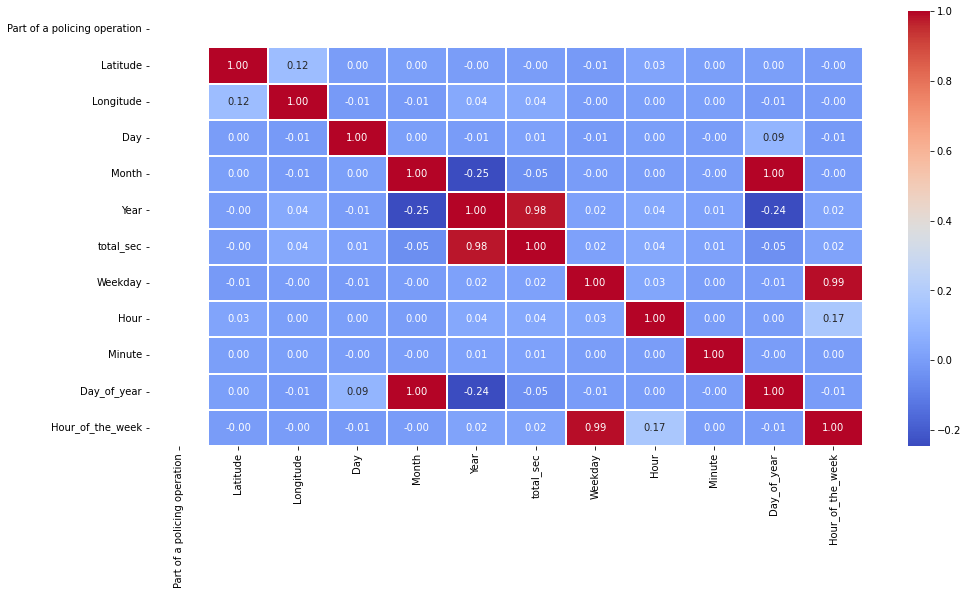

In [ ]:
corr_matrix = sas.corr(method='spearman')
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Train only on time - related features

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

# create datasets
X, y = sas.drop(['Latitude', 'Longitude', 'Age range', 'Date',
                 'Part of a policing operation', 'Type', 'Legislation', 'Outcome'], axis=1), sas[['Longitude', 'Latitude']]
# define model
model = KNeighborsRegressor()
# fit model
model.fit(X[:1000000], y[:1000000])
# make a prediction
yhat = model.predict(X[1000000:])
# summarize prediction
print(yhat[0])

[-0.1199854 51.4904736]


In [ ]:
yhat_df = pd.DataFrame(yhat, columns=['Long_pred', 'Lat_pred'])
ytrue_df = pd.DataFrame(sas_oh['Longitude'][1000000:]).reset_index().drop(['index'], axis=1)
ytrue_df['Latitude'] = (sas_oh['Latitude'][1000000:]).reset_index().drop(['index'], axis=1)
predictions = pd.DataFrame()
predictions['long_true'] = ytrue_df['Longitude']
predictions['lat_true'] = ytrue_df['Latitude']
predictions['long_pred'] = yhat_df['Long_pred']
predictions['lat_pred'] = yhat_df['Lat_pred']

predictions

,long_true,lat_true,long_pred,lat_pred
0,-0.199059,51.366460,-0.119985,51.490474
1,-0.231287,51.501146,-0.119985,51.490474
2,-0.340562,51.603681,-0.119985,51.490474
3,-0.340562,51.603681,-0.119985,51.490474
4,-0.101007,51.403014,-0.119985,51.490474
...,...,...,...,...
8619,-0.098572,51.516767,-0.119985,51.490474
8620,-0.097562,51.518864,-0.119985,51.490474
8621,-0.081516,51.510014,-0.119985,51.490474
8622,-0.081516,51.510014,-0.119985,51.490474


In [ ]:
mse_long = sum((predictions['long_true'] - predictions['long_pred'])**2)/len(predictions)
mse_lat = sum((predictions['lat_true'] - predictions['lat_pred'])**2)/len(predictions)
mse_long, mse_lat

# still pretty good - so maybe we do not have to "recreate" the other features to make predictions
# into the future locations

(0.012652773352434699, 0.0031047514189845573)

In [ ]:
# for prediction, make a time series - dates and hours into the next year
# Then, run the above model to make predictions on the generated dates 

In [ ]:
df_future = pd.DataFrame()

In [ ]:
import datetime

x = datetime.datetime(2022, 1, 1, 0)
for i in range(1, 24*365):
    x += datetime.timedelta(hours=1)
    df_future.loc[i,0] = x
    
df_future = df_future.rename(columns={0:'Date'})

In [ ]:
from datetime import datetime
# feature extraction (time)
df_future['Day'] = df_future.Date.dt.day
df_future['Month'] = df_future.Date.dt.month
df_future['Year'] = df_future.Date.dt.year
df_future['total_sec'] = df_future.Date.apply(lambda x: datetime.timestamp(x))
df_future['Weekday'] = df_future.Date.dt.weekday
df_future['Hour'] = df_future.Date.dt.hour
df_future['Minute'] = df_future.Date.dt.minute
df_future['Day_of_year'] = df_future.Date.dt.dayofyear
df_future['Hour_of_the_week'] = df_future.Date.dt.dayofweek * 24 + (df_future.Date.dt.hour + 1)

df_future = df_future.drop(columns=['Date'])

In [ ]:
yhat = model.predict(df_future)

In [ ]:
df_future_pred = pd.DataFrame(yhat, columns=['Long_pred', 'Lat_pred'])
# df_future['Long_pred'], df_future['Lat_pred'] = yhat
df_future_lr = df_future.join(df_future_pred)

In [ ]:
df_future_lr.describe()

,Day,Month,Year,total_sec,Weekday,Hour,Minute,Day_of_year,Hour_of_the_week,Long_pred,Lat_pred
count,8759.000000,8759.000000,8759.0,8.759000e+03,8759.000000,8759.000000,8759.0,8759.000000,8759.000000,8.758000e+03,8.758000e+03
mean,15.722229,6.526658,2022.0,1.656757e+09,3.005252,11.501313,0.0,183.020779,84.627355,-1.659276e-01,5.152438e+01
std,8.795845,3.447739,0.0,9.102914e+06,2.000107,6.921886,0.0,105.360110,48.500365,1.670981e-14,7.198209e-12
min,1.000000,1.000000,2022.0,1.640995e+09,0.000000,0.000000,0.0,1.000000,1.000000,-1.659276e-01,5.152438e+01
25%,8.000000,4.000000,2022.0,1.648874e+09,1.000000,6.000000,0.0,92.000000,43.000000,-1.659276e-01,5.152438e+01
50%,16.000000,7.000000,2022.0,1.656756e+09,3.000000,12.000000,0.0,183.000000,85.000000,-1.659276e-01,5.152438e+01
75%,23.000000,10.000000,2022.0,1.664638e+09,5.000000,17.500000,0.0,274.000000,127.000000,-1.659276e-01,5.152438e+01
max,31.000000,12.000000,2022.0,1.672524e+09,6.000000,23.000000,0.0,365.000000,168.000000,-1.659276e-01,5.152438e+01


#### Train GradientBoostingRegressor only on time-related features:

In [ ]:
gbr_long = GradientBoostingRegressor(loss='squared_error', alpha=alpha,
                                     n_estimators=20, max_depth=3,
                                     learning_rate=.1, min_samples_leaf=9,
                                     min_samples_split=9, verbose=True)

gbr_long.fit(X[:1000000], y['Longitude'][:1000000])
y_pred_future_long = gbr_long.predict(df_future[X.columns])

      Iter       Train Loss   Remaining Time 
         1           0.0186           13.39s
         2           0.0186           12.52s
         3           0.0186           11.61s
         4           0.0185           10.91s
         5           0.0185           10.26s
         6           0.0185            9.65s
         7           0.0185            8.98s
         8           0.0185            8.22s
         9           0.0185            7.53s
        10           0.0185            6.86s
        20           0.0185            0.00s


In [ ]:
gbr_lat = GradientBoostingRegressor(loss='squared_error', alpha=alpha,
                                     n_estimators=20, max_depth=3,
                                     learning_rate=.1, min_samples_leaf=9,
                                     min_samples_split=9, verbose=True)

gbr_lat.fit(X[:1000000], y['Latitude'][:1000000])
y_pred_future_lat = gbr_lat.predict(df_future[X.columns])

      Iter       Train Loss   Remaining Time 
         1           0.0038           12.98s
         2           0.0038           12.99s
         3           0.0038           12.27s
         4           0.0038           11.46s
         5           0.0038           10.54s
         6           0.0038            9.75s
         7           0.0038            9.00s
         8           0.0038            8.35s
         9           0.0038            7.63s
        10           0.0038            6.93s
        20           0.0038            0.00s


In [ ]:
df_future_gbr = pd.DataFrame(y_pred_future_long, columns=['Long_pred_future'])
df_future_gbr['Lat_pred_future'] = y_pred_future_lat
df_future_gbr = df_future.join(df_future_gbr)

In [ ]:
df_future_gbr

,Day,Month,Year,total_sec,Weekday,Hour,Minute,Day_of_year,Hour_of_the_week,Long_pred_future,Lat_pred_future
1,1,1,2022,1.640995e+09,5,1,0,1,122,-0.116205,51.495271
2,1,1,2022,1.640999e+09,5,2,0,1,123,-0.116205,51.495271
3,1,1,2022,1.641002e+09,5,3,0,1,124,-0.116205,51.495271
4,1,1,2022,1.641006e+09,5,4,0,1,125,-0.116205,51.495271
5,1,1,2022,1.641010e+09,5,5,0,1,126,-0.107693,51.495271
...,...,...,...,...,...,...,...,...,...,...,...
8755,31,12,2022,1.672510e+09,5,19,0,365,140,-0.107869,51.507639
8756,31,12,2022,1.672513e+09,5,20,0,365,141,-0.112158,51.507579
8757,31,12,2022,1.672517e+09,5,21,0,365,142,-0.112730,51.502934
8758,31,12,2022,1.672520e+09,5,22,0,365,143,-0.113801,51.501453


In [ ]:
df_future_gbr.describe()

# after including london, std is not so low anymore - may be usable

,Day,Month,Year,total_sec,Weekday,Hour,Minute,Day_of_year,Hour_of_the_week,Long_pred_future,Lat_pred_future
count,8759.000000,8759.000000,8759.0,8.759000e+03,8759.000000,8759.000000,8759.0,8759.000000,8759.000000,8758.000000,8758.000000
mean,15.722229,6.526658,2022.0,1.656757e+09,3.005252,11.501313,0.0,183.020779,84.627355,-0.108443,51.503983
std,8.795845,3.447739,0.0,9.102914e+06,2.000107,6.921886,0.0,105.360110,48.500365,0.004321,0.003940
min,1.000000,1.000000,2022.0,1.640995e+09,0.000000,0.000000,0.0,1.000000,1.000000,-0.120419,51.495271
25%,8.000000,4.000000,2022.0,1.648874e+09,1.000000,6.000000,0.0,92.000000,43.000000,-0.113162,51.500590
50%,16.000000,7.000000,2022.0,1.656756e+09,3.000000,12.000000,0.0,183.000000,85.000000,-0.106809,51.504909
75%,23.000000,10.000000,2022.0,1.664638e+09,5.000000,17.500000,0.0,274.000000,127.000000,-0.106591,51.508136
max,31.000000,12.000000,2022.0,1.672524e+09,6.000000,23.000000,0.0,365.000000,168.000000,-0.102100,51.508408


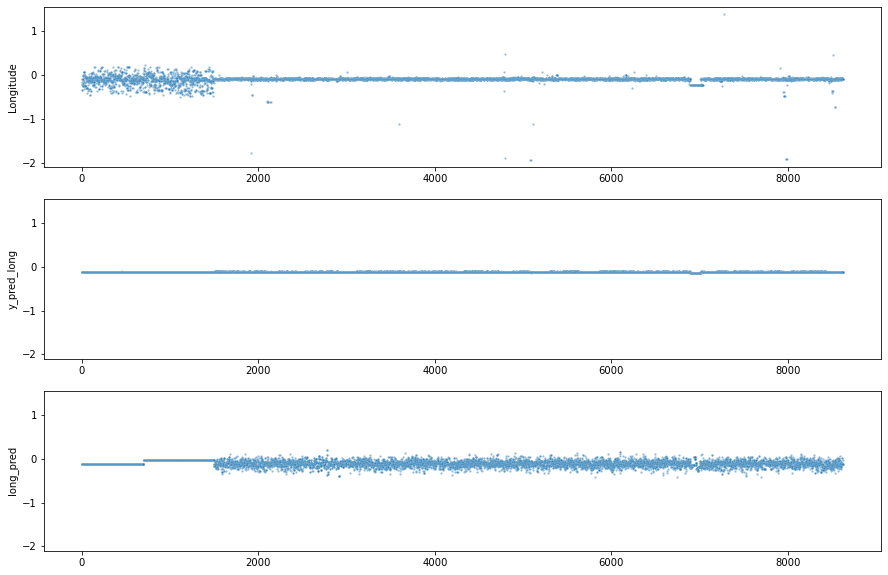

In [ ]:
# plot predictions of gradient boosting regressor for longitude
fig, ax = plt.subplots(figsize=(15,10), nrows=3, sharey=True)
sns.scatterplot(x=predictions_gbr.index, y='Longitude', data=predictions_gbr, alpha=0.5, s=5, ax=ax[0])
sns.scatterplot(x=predictions_gbr.index, y='y_pred_long', data=predictions_gbr, alpha=0.5, s=5, ax=ax[1])
sns.scatterplot(x=predictions.index, y='long_pred', data=predictions, alpha=0.5, s=5, ax=ax[2]);

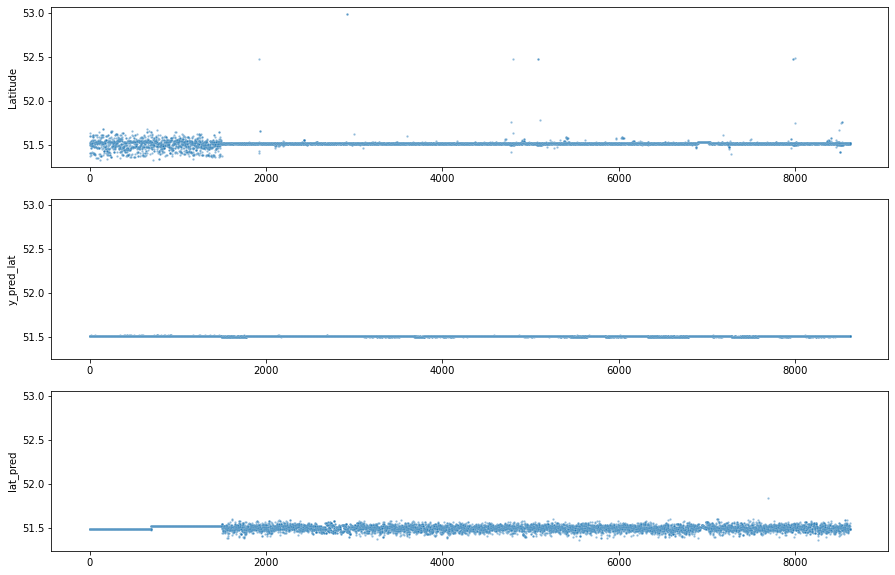

In [ ]:
# ... and for latitude
fig, ax = plt.subplots(figsize=(15,10), nrows=3, sharey=True)
sns.scatterplot(x=predictions_gbr.index, y='Latitude', data=predictions_gbr, alpha=0.5, s=5, ax=ax[0])
sns.scatterplot(x=predictions_gbr.index, y='y_pred_lat', data=predictions_gbr, alpha=0.5, s=5, ax=ax[1])
sns.scatterplot(x=predictions.index, y='lat_pred', data=predictions, alpha=0.5, s=5, ax=ax[2]);

In [ ]:
# try decision tree - looking for more variable predictions
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

# define model
dt = DecisionTreeRegressor()
# fit model
dt.fit(X[:1000000], y[:1000000])
# future - prediction
y_pred_future_dt = dt.predict(df_future)

In [ ]:
df_for_mse_dt = pd.DataFrame(dt.predict(X[1000000:]), columns=['Long_pred_dt', 'Lat_pred_dt'])
df_for_mse_dt['Longitude'] = ytrue_df['Longitude']
df_for_mse_dt['Latitude'] = ytrue_df['Latitude']
mse_long = (sum((df_for_mse_dt['Longitude'] - df_for_mse_dt['Long_pred_dt'])**2))/len(df_for_mse_dt)
mse_lat = (sum((df_for_mse_dt['Latitude'] - df_for_mse_dt['Lat_pred_dt'])**2))/len(df_for_mse_dt)

mse_long, mse_lat

(0.024822994846251636, 0.00572355467283327)

In [ ]:
# comparison:
print_mse()
print('-'*80)
print('Method: DecisionTreeRegressor')
print('MSE longitude, latitude: (' + str(mse_long) + ', ' + str(mse_lat) +')')

Method: GradientBoostingRegressor
MSE longitude: 0.0462954058318905, 0.0818321910549432, 0.024822994846251636
MSE latitude: 0.009225665806534814, 0.018365918982080644, 0.00572355467283327
--------------------------------------------------------------------------------
Method: KNeighborsRegressor
MSE longitude, latitude: (0.012976597701113124, 0.0031360510938239438)
--------------------------------------------------------------------------------
Method: DecisionTreeRegressor
MSE longitude, latitude: (0.024822994846251636, 0.00572355467283327)


In [ ]:
df_for_mse_dt.describe()

,Long_pred_dt,Lat_pred_dt,Longitude,Latitude
count,8624.000000,8624.000000,8624.000000,8624.000000
mean,-0.116469,51.502845,-0.097215,51.514053
std,0.132614,0.059741,0.084854,0.044940
min,-0.861312,51.315469,-1.936234,51.328723
25%,-0.186999,51.464773,-0.099818,51.511625
50%,-0.110689,51.510953,-0.084983,51.515075
75%,-0.043796,51.543791,-0.078484,51.517680
max,0.366966,52.421806,1.384011,52.979289


#### Which model to choose?
For decision tree, higher deviation (visible), but also higher error.
--> discuss in the meeting - which one to choose?


Probably decision tree makes more sense for hot spot predictions - actual numbers are not that important but it is more valuable to have more spots marked, not just one

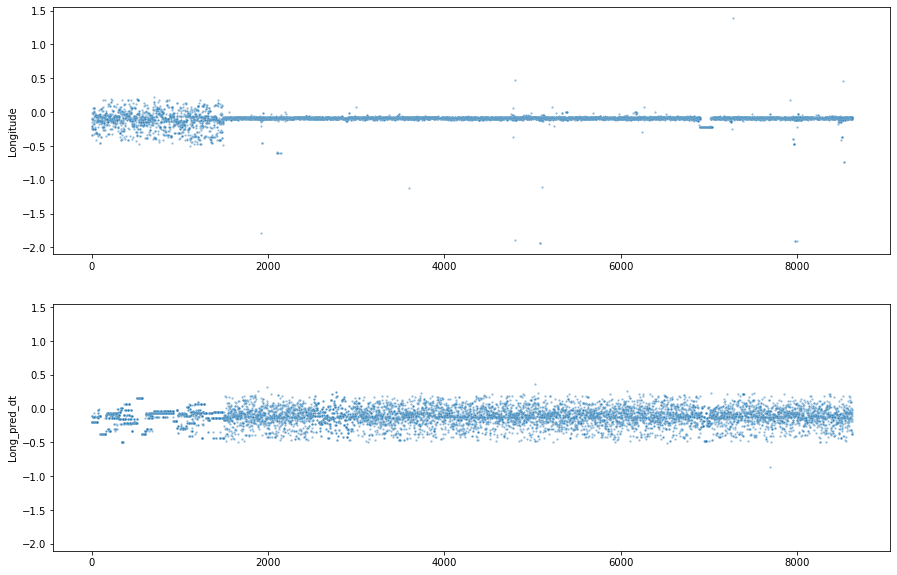

In [ ]:
# plot predictions of decision tree for longitude:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharey=True)
sns.scatterplot(x=df_for_mse_dt.index, y='Longitude', data=df_for_mse_dt, alpha=0.5, s=5, ax=ax[0])
sns.scatterplot(x=df_for_mse_dt.index, y='Long_pred_dt', data=df_for_mse_dt, alpha=0.5, s=5, ax=ax[1]);

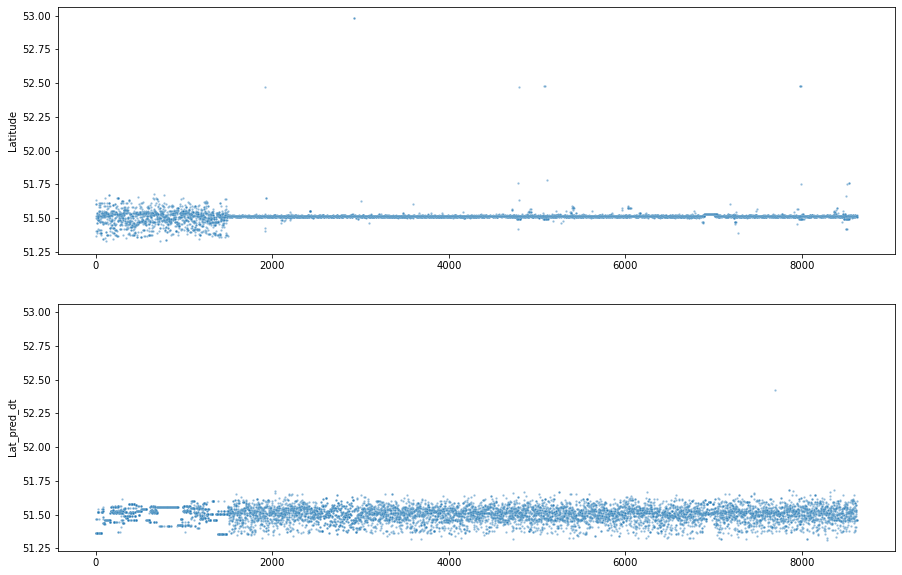

In [ ]:
# plot predictions of decision tree for latitude:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharey=True)
sns.scatterplot(x=df_for_mse_dt.index, y='Latitude', data=df_for_mse_dt, alpha=0.5, s=5, ax=ax[0])
sns.scatterplot(x=df_for_mse_dt.index, y='Lat_pred_dt', data=df_for_mse_dt, alpha=0.5, s=5, ax=ax[1]);

In [ ]:
df_future_dt = pd.DataFrame()
df_future_pred_dt = pd.DataFrame(y_pred_future_dt, columns=['Long_pred', 'Lat_pred'])
# df_future['Long_pred'], df_future['Lat_pred'] = yhat
df_future_dt = df_future.join(df_future_pred_dt)
df_future_dt
# yeeey finally we get different predictions

,Date,Day,Month,Year,total_sec,Weekday,Hour,Minute,Day_of_year,Hour_of_the_week,Long_pred,Lat_pred
1,2022-01-01 01:00:00,1,1,2022,1.640995e+09,5,1,0,1,122,-0.417886,51.506905
2,2022-01-01 02:00:00,1,1,2022,1.640999e+09,5,2,0,1,123,-0.417886,51.506905
3,2022-01-01 03:00:00,1,1,2022,1.641002e+09,5,3,0,1,124,-0.417886,51.506905
4,2022-01-01 04:00:00,1,1,2022,1.641006e+09,5,4,0,1,125,-0.014296,51.582041
5,2022-01-01 05:00:00,1,1,2022,1.641010e+09,5,5,0,1,126,-0.417095,51.520589
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,31,12,2022,1.672510e+09,5,19,0,365,140,-0.095437,51.502583
8756,2022-12-31 20:00:00,31,12,2022,1.672513e+09,5,20,0,365,141,-0.091173,51.510891
8757,2022-12-31 21:00:00,31,12,2022,1.672517e+09,5,21,0,365,142,-0.091173,51.510891
8758,2022-12-31 22:00:00,31,12,2022,1.672520e+09,5,22,0,365,143,NaN,NaN


In [ ]:
df_future_dt.describe()

,Day,Month,Year,total_sec,Weekday,Hour,Minute,Day_of_year,Hour_of_the_week,Long_pred,Lat_pred
count,8759.000000,8759.000000,8759.0,8.759000e+03,8759.000000,8759.000000,8759.0,8759.000000,8759.000000,8757.000000,8757.000000
mean,15.722229,6.526658,2022.0,1.656757e+09,3.005252,11.501313,0.0,183.020779,84.627355,-0.100242,51.511883
std,8.795845,3.447739,0.0,9.102914e+06,2.000107,6.921886,0.0,105.360110,48.500365,0.169520,0.048193
min,1.000000,1.000000,2022.0,1.640995e+09,0.000000,0.000000,0.0,1.000000,1.000000,-0.473712,51.342003
25%,8.000000,4.000000,2022.0,1.648874e+09,1.000000,6.000000,0.0,92.000000,43.000000,-0.101193,51.502583
50%,16.000000,7.000000,2022.0,1.656756e+09,3.000000,12.000000,0.0,183.000000,85.000000,-0.095437,51.502583
75%,23.000000,10.000000,2022.0,1.664638e+09,5.000000,17.500000,0.0,274.000000,127.000000,-0.016397,51.541573
max,31.000000,12.000000,2022.0,1.672524e+09,6.000000,23.000000,0.0,365.000000,168.000000,0.249114,51.666321


In [ ]:
# save the decision tree predictions to a csv for the app:
df_future_dt = pd.DataFrame(y_pred_future_dt, columns=['long_pred', 'lat_pred'])
df_future_dt = df_future.reset_index().join(df_future_dt)
df_future_dt.to_csv('dec_tree_future_met_and_london.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40789b9a-1c62-45b9-9d9c-b1a39ebe3dfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>